# Instalación y conexión a drive

In [1]:
%%capture
!pip install netcdf4
!pip install geopandas

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Abriendo los shapefiles y NETCDF

## Shapefile

In [4]:
ruta_Sudamerica = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/shps/South_America.shp"
Sudamerica = gpd.read_file(ruta_Sudamerica)

In [5]:
ruta_lago = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/lago_titicaca/lago_titicaca_sideteva_puno.shp"
lago_titicaca = gpd.read_file(ruta_lago)
lago_titicaca = lago_titicaca.to_crs("EPSG:4326")

## NETCDF

In [6]:
ruta_pp = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/PISCO/piscov2p1(prec).nc"
PISCO_pp = xr.open_dataset(ruta_pp,decode_times=False)
PISCO_pp

<xarray.Dataset>
Dimensions:  (X: 133, T: 432, Y: 198)
Coordinates:
  * X        (X) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
  * T        (T) float32 252.5 253.5 254.5 255.5 ... 680.5 681.5 682.5 683.5
  * Y        (Y) float32 0.95 0.85 0.75 0.65 ... -18.45 -18.55 -18.65 -18.75
Data variables:
    Prec     (T, Y, X) float32 ...

In [7]:
PISCO_pp=PISCO_pp.rename({"X":"longitude","Y":"latitude","T":"time"})
PISCO_pp #corregir el tema de las coordenadas

<xarray.Dataset>
Dimensions:    (longitude: 133, time: 432, latitude: 198)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) float32 252.5 253.5 254.5 255.5 ... 681.5 682.5 683.5
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [8]:
PISCO_pp["time"] = pd.date_range(start="1981-01-01",freq="1M", periods= 432)
PISCO_pp #me parece que el periods es el numero de meeses, tmb sale indicado en la tabla
#cambiando eje temporal

<xarray.Dataset>
Dimensions:    (longitude: 133, time: 432, latitude: 198)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2016-12-31
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
Data variables:
    Prec       (time, latitude, longitude) float32 ...

# Figura pp acumulado

In [9]:
pp_filtro=PISCO_pp.sel(time=slice('1981-06-01T00:00:00.000000000','2010-05-31T12:00:00.000000000'))
pp_filtro

<xarray.Dataset>
Dimensions:    (longitude: 133, time: 348, latitude: 198)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) datetime64[ns] 1981-06-30 1981-07-31 ... 2010-05-31
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
Data variables:
    Prec       (time, latitude, longitude) float32 ...

## Agrupar por estación

In [10]:
pp_filtro.groupby('time.season')

DatasetGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [11]:
pp_summer = pp_filtro.groupby('time.season').mean(dim='time').sel(season='DJF')
pp_summer

<xarray.Dataset>
Dimensions:    (longitude: 133, latitude: 198)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
    season     <U3 'DJF'
Data variables:
    Prec       (latitude, longitude) float32 nan nan nan ... 59.27 63.57 63.52

In [12]:
pp_winter = pp_filtro.groupby('time.season').mean(dim='time').sel(season='JJA')
pp_winter

<xarray.Dataset>
Dimensions:    (longitude: 133, latitude: 198)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
    season     <U3 'JJA'
Data variables:
    Prec       (latitude, longitude) float32 nan nan nan ... 1.309 1.238 1.26

In [13]:
pp_spring = pp_filtro.groupby('time.season').mean(dim='time').sel(season='SON')
pp_spring

<xarray.Dataset>
Dimensions:    (longitude: 133, latitude: 198)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
    season     <U3 'SON'
Data variables:
    Prec       (latitude, longitude) float32 nan nan nan ... 2.85 3.237 3.356

In [14]:
pp_autumn = pp_filtro.groupby('time.season').mean(dim='time').sel(season='MAM')
pp_autumn

<xarray.Dataset>
Dimensions:    (longitude: 133, latitude: 198)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
    season     <U3 'MAM'
Data variables:
    Prec       (latitude, longitude) float32 nan nan nan ... 12.58 11.51 12.78

## Avance pp DJF

Text(0.5, 1.0, '')

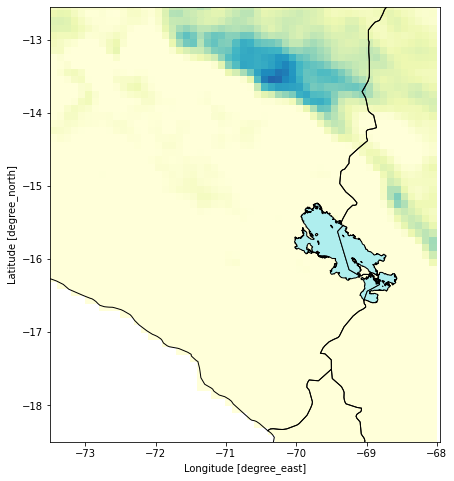

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
pp_summer.Prec.plot(ax=ax, cmap ="YlGnBu", vmin=150, vmax=1100, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.95, -12.55
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_title("")

# RESULTADO FINAL

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

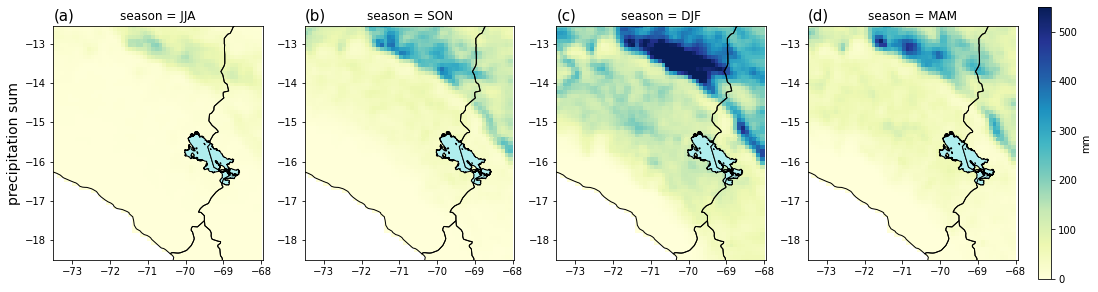

In [17]:
from mpl_toolkits.mplot3d import axes3d
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
#invierno
ax1 = axs[0]
pp_winter.Prec.plot(ax=ax1, cmap ="YlGnBu", vmin=0,vmax=550,add_colorbar=False)
lugar = Sudamerica.plot(ax=ax1,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax1,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy =  -73.5, -18.5, -67.95, -12.55
ax1.set_xlim(minx, maxx)
ax1.set_ylim(miny, maxy)
ax1.set_ylabel("precipitation sum", size=14)
ax1.set_xlabel("")
axs[0].set_title('(a)', loc='left', fontsize = 15)

#primavera
ax2 = axs[1]
pp_spring.Prec.plot(ax=ax2, cmap ="YlGnBu",vmin=0,vmax=550, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax2,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax2,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy =  -73.5, -18.5, -67.95, -12.55
ax2.set_xlim(minx, maxx)
ax2.set_ylim(miny, maxy)
ax2.set_ylabel("")
ax2.set_xlabel("")
axs[1].set_title('(b)', loc='left', fontsize = 15)

#verano
ax3 = axs[2]
pp_summer.Prec.plot(ax=ax3, cmap ="YlGnBu",vmin=0,vmax=550, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax3,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax3,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy =  -73.5, -18.5, -67.95, -12.55
ax3.set_xlim(minx, maxx)
ax3.set_ylim(miny, maxy)
ax3.set_ylabel("")
ax3.set_xlabel("")
axs[2].set_title('(c)', loc='left', fontsize = 15)

#autumn
ax4 = axs[3]
prec = pp_autumn.Prec.plot(ax=ax4, cmap ="YlGnBu",vmin=0,vmax=550,add_colorbar=False)
lugar = Sudamerica.plot(ax=ax4,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax4,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy =  -73.5, -18.5, -67.95, -12.55
ax4.set_xlim(minx, maxx)
ax4.set_ylim(miny, maxy)
ax4.set_ylabel("")
ax4.set_xlabel("")
axs[3].set_title('(d)', loc='left', fontsize = 15)


fig.colorbar(prec, ax=axs, label = "mm", fraction=0.02, pad=0.02)